# plot some of the loss results

In [49]:
import json 
import matplotlib.pyplot as plt
import numpy as np
import os

In [50]:
ROOT = "media"   # change if needed

# Fields to extract
FIELDS = [
    "mean_ng",
    "Nbw",
    "NDBP",
    "max_disp",
    "max_loss",
    "max_loss_ng2",
    "true_cost"
]

records = []   # list of dicts

for root, dirs, files in os.walk(ROOT):
    if "meta_data.json" in files:
        json_path = os.path.join(root, "meta_data.json")

        # Extract test identifiers
        parts = json_path.split(os.sep)
        test_name = parts[-2]              # e.g., "test0"
        loss_test = parts[-3]              # e.g., "loss_tests0"
        ng_dir = parts[-4]                 # e.g., "ng10"

        with open(json_path, "r") as f:
            data = json.load(f)

        # Store extracted values
        record = {
            "ng": ng_dir,
            "loss_group": loss_test,
            "test": test_name
        }
        for key in FIELDS:
            record[key] = data.get(key, None)

        records.append(record)

# -----------------------------
# Convert to numpy structured array
# -----------------------------
dtype = [
    ("ng", "U32"),
    ("loss_group", "U32"),
    ("test", "U32"),
] + [(field, "f8") for field in FIELDS]

np_array = np.zeros(len(records), dtype=dtype)

for i, rec in enumerate(records):
    np_array[i]["ng"] = rec["ng"]
    np_array[i]["loss_group"] = rec["loss_group"]
    np_array[i]["test"] = rec["test"]
    for field in FIELDS:
        np_array[i][field] = rec[field]

# Optional: also produce a pandas DataFrame
try:
    import pandas as pd
    df = pd.DataFrame(records)
except ImportError:
    df = None

# Preview
print("Extracted", len(records), "records.")
print(records[:2])       # sample
print(np_array[:2])      # numpy view


Extracted 1746 records.
[{'ng': 'ng24', 'loss_group': 'loss_tests18', 'test': 'test0', 'mean_ng': 25.65112529668935, 'Nbw': 0.017881941655710155, 'NDBP': 0.4586919259587098, 'max_disp': 9480.981285918037, 'max_loss': 50.67780815733461, 'max_loss_ng2': 0.06563013489853313, 'true_cost': 1.121968412012978}, {'ng': 'ng24', 'loss_group': 'loss_tests18', 'test': 'test7', 'mean_ng': 18.29232739482097, 'Nbw': 0.03215339593266948, 'NDBP': 0.588160445255695, 'max_disp': 52095.20168506334, 'max_loss': 12.586119840435659, 'max_loss_ng2': 0.007106457726675945, 'true_cost': 5.7477413009396345}]
[('ng24', 'loss_tests18', 'test0', 25.6511253 , 0.01788194, 0.45869193,  9480.98128592, 50.67780816, 0.06563013, 1.12196841)
 ('ng24', 'loss_tests18', 'test7', 18.29232739, 0.0321534 , 0.58816045, 52095.20168506, 12.58611984, 0.00710646, 5.7477413 )]


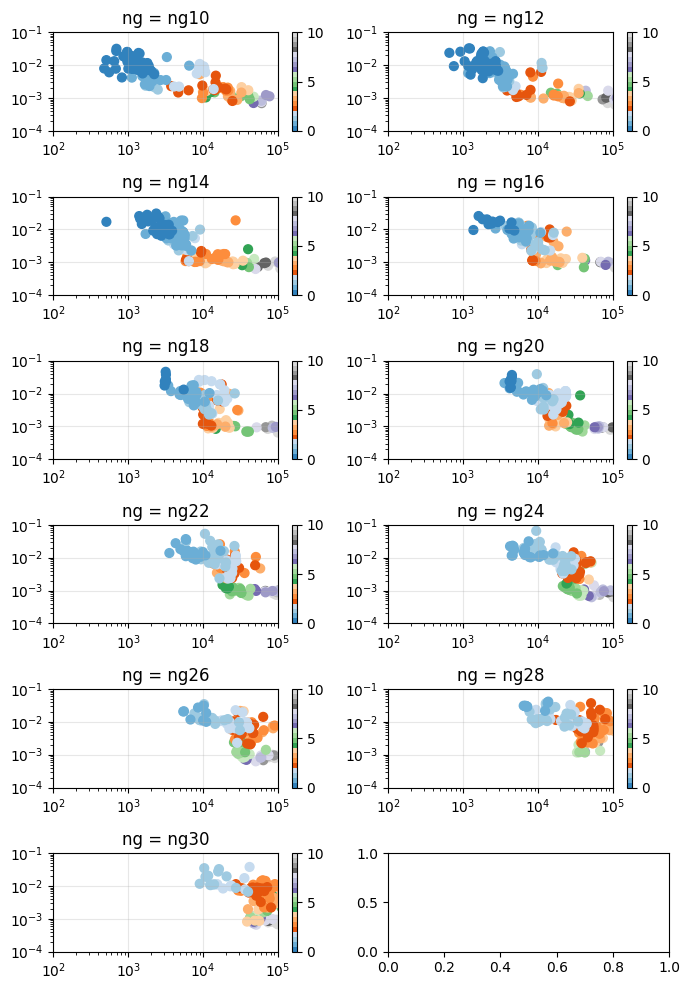

In [51]:
ng_strings = ["ng10","ng12","ng14","ng16","ng18","ng20","ng22","ng24","ng26","ng28","ng30"]

fig, axs = plt.subplots(6, 2, figsize=(7, 10))
for i, ng_string in enumerate(ng_strings):
    mask = (np_array["ng"] == ng_string)
    sub = np_array[mask]

    # Extract values
    x = sub["max_disp"]
    y = sub["max_loss_ng2"]
    c = sub["true_cost"]

    # Sort such that smaller c values appear last (on top)
    sort_idx = np.argsort(c)[::-1]  # sort descending so smallest c last (will be plotted last, appear "on top")
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]
    c_sorted = c[sort_idx]

    axs[i//2, i%2].grid(True, alpha=0.3)
    sc = axs[i//2, i%2].scatter(x_sorted, y_sorted, c=c_sorted, s=40, cmap='tab20c', vmin=0, vmax=10)
    plt.colorbar(sc, ax=axs[i//2, i%2])

    axs[i//2, i%2].set_xscale("log")
    axs[i//2, i%2].set_yscale("log")
    axs[i//2, i%2].set_xlim(1e2, 1e5)
    axs[i//2, i%2].set_ylim(1e-4, 1e-1)
    axs[i//2, i%2].set_title(f"ng = {ng_string}")

plt.tight_layout()
plt.show()



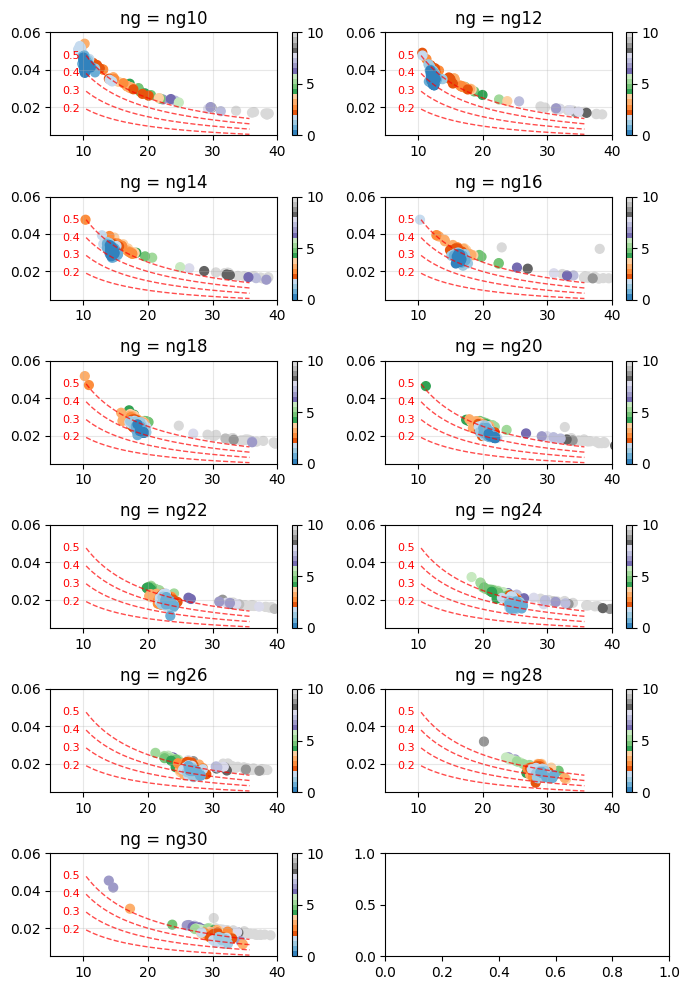

In [52]:
ng_strings = ["ng10","ng12","ng14","ng16","ng18","ng20","ng22","ng24","ng26","ng28","ng30"]

fig, axs = plt.subplots(6, 2, figsize=(7, 10))
for i, ng_string in enumerate(ng_strings):
    mask = (np_array["ng"] == ng_string)
    sub = np_array[mask]

    # Extract values
    x = sub["mean_ng"]
    y = sub["Nbw"]
    c = sub["true_cost"]

    # Sort such that smaller c values appear last (on top)
    sort_idx = np.argsort(c)[::-1]  # sort descending so smallest c last (will be plotted last, appear "on top")
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]
    c_sorted = c[sort_idx]

    axs[i//2, i%2].set_xlim(5,40)
    axs[i//2, i%2].set_ylim(0.005,0.06)
    axs[i//2, i%2].grid(True, alpha=0.3)
    sc = axs[i//2, i%2].scatter(x_sorted, y_sorted, c=c_sorted, s=40, cmap='tab20c', vmin=0, vmax=10)
    plt.colorbar(sc, ax=axs[i//2, i%2])

    # Add the lines of constant mean_ngs*nbws=0.2, 0.3, 0.4, 0.5 without affecting axis limits, and annotate each line with its value
    x_min = 10 * 1.05
    x_max = 35 * 1.02
    x_vals = np.linspace(x_min, x_max, 300)
    for const in [0.2, 0.3, 0.4, 0.5]:
        y_vals = const / x_vals
        # Plot the line
        axs[i//2, i%2].plot(x_vals, y_vals, color='red', linestyle='--', linewidth=1, alpha=0.7, zorder=2, clip_on=False)
        # Add a text label to the left of the line (at the largest x value), slightly offset to the left
        idx = 0  # leftmost x value
        axs[i//2, i%2].text(
            x_vals[idx] - 1,   # small left offset
            y_vals[idx],
            f"{const:.1f}",
            color='red',
            fontsize=8,
            verticalalignment='center',
            horizontalalignment='right'
        )

    axs[i//2, i%2].set_title(f"ng = {ng_string}")

plt.tight_layout()



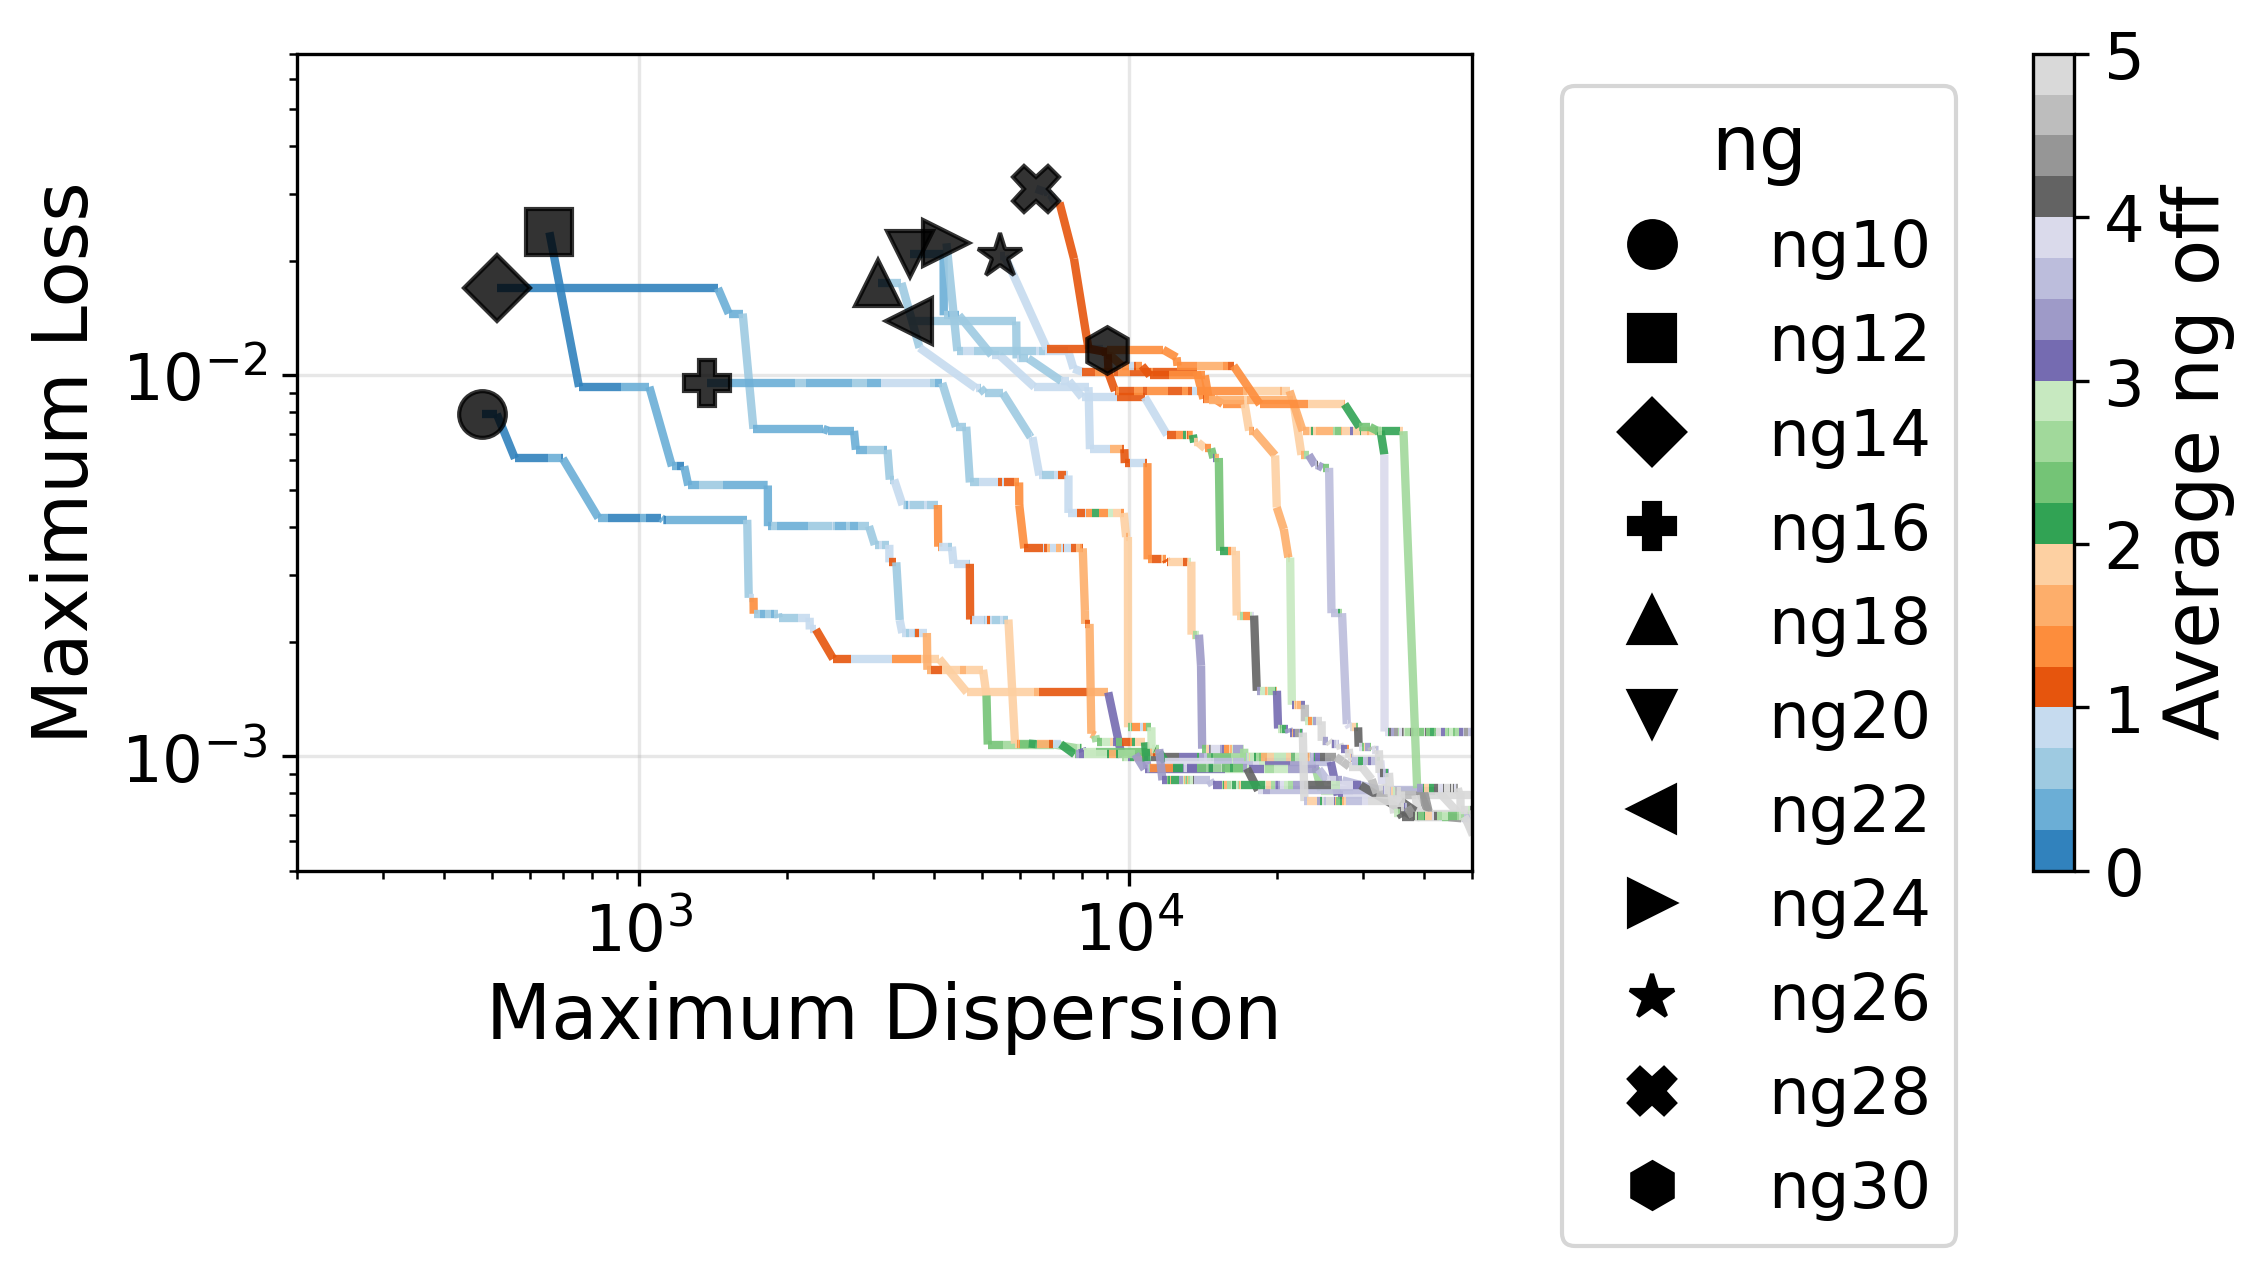

In [68]:
ng_strings = ["ng10","ng12","ng14","ng16","ng18","ng20","ng22","ng24","ng26","ng28","ng30"]

import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ---- Add text scale variable here ----
TEXT_SCALE = 1.4  # Change this value (e.g., 1.0 for default, 1.2 for larger, 0.8 for smaller, etc.)

fig, ax = plt.subplots(1, 1, figsize=(8, 4),dpi=300)

# Instead of autoscaling, fix vmin/vmax to [0,10] for true_cost coloring
norm = mcolors.Normalize(vmin=0, vmax=5)
sm = cm.ScalarMappable(cmap='tab20c', norm=norm)
sm.set_array([])

from itertools import cycle

# Style map for ng, e.g., marker style or linestyle
markers = ['o', 's', 'D', 'P', '^', 'v', '<', '>', '*', 'X', 'h']
ng_marker_map = {ng: markers[i % len(markers)] for i, ng in enumerate(ng_strings)}

for i, ng_string in enumerate(ng_strings):
    mask = (np_array["ng"] == ng_string)
    sub = np_array[mask]

    # Get values
    disp = sub["max_disp"]
    loss = sub["max_loss_ng2"]
    true_cost = sub["true_cost"]

    # (1) Sort by increasing dispersion
    sort_idx = np.argsort(disp)
    disp_sorted = np.array(disp)[sort_idx]
    loss_sorted = np.array(loss)[sort_idx]
    true_cost_sorted = np.array(true_cost)[sort_idx]

    # (2) Compute lower envelope of loss as a function of dispersion (minimum loss so far)
    min_loss_so_far = np.minimum.accumulate(loss_sorted)
    # Remove duplicate dispersion values (keep lowest min_loss_so_far for each unique disp value)
    disp_unique, idx_unique = np.unique(disp_sorted, return_index=True)
    min_loss_at_disp = min_loss_so_far[idx_unique]
    true_cost_at_disp = true_cost_sorted[idx_unique]

    # (3) Color by true_cost (use true cost at each enveloped point as color)
    # The line is colored segmentwise by true_cost_at_disp; we use LineCollection
    from matplotlib.collections import LineCollection
    segments = []
    segment_colors = []
    for j in range(len(disp_unique) - 1):
        segments.append([
            (disp_unique[j], min_loss_at_disp[j]),
            (disp_unique[j+1], min_loss_at_disp[j+1])
        ])
        # For each segment, use the average true_cost of its endpoints
        mean_cost = 0.5 * (true_cost_at_disp[j] + true_cost_at_disp[j+1])
        segment_colors.append(mean_cost)

    lc = LineCollection(segments, cmap='tab20c', norm=norm, linewidths=2, alpha=0.9)
    lc.set_array(np.array(segment_colors))

    # Use different marker per ng, but plot only one marker per line (left-most point)
    ax.add_collection(lc)
    marker = ng_marker_map[ng_string]
    ax.plot(disp_unique[0], min_loss_at_disp[0], marker=marker, markersize=8 * TEXT_SCALE, label=f"{ng_string}", color='k', alpha=0.8)

# Labels, log/y, xlim/ylim, colorbar, legend
ax.grid(True, alpha=0.3)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xscale("log")
ax.set_xlim(2e2,5e4)
ax.set_ylim(5e-4,7e-2)
ax.set_xlabel("Maximum Dispersion", fontsize=13 * TEXT_SCALE)
ax.set_ylabel("Maximum Loss", fontsize=13 * TEXT_SCALE)
ax.tick_params(axis='both', which='major', labelsize=11 * TEXT_SCALE)

# Colorbar for true_cost (0 to 10 color range)
cb = plt.colorbar(sm, ax=ax, pad=0.275)
cb.set_label("Average ng off", fontsize=13 * TEXT_SCALE)
cb.ax.tick_params(labelsize=11 * TEXT_SCALE)

# Legend for ng (by marker)
handles = [
    plt.Line2D([0], [0], marker=ng_marker_map[ng], color='k', linestyle='', label=ng, markersize=8 * TEXT_SCALE)
    for ng in ng_strings
]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11 * TEXT_SCALE, title="ng", title_fontsize=13 * TEXT_SCALE)

plt.tight_layout()
plt.show()
